## Kaggle Home Credit - Modeling
Joshua Hawley  
u0090368  
Graduate Capstone 1  

### Table of Contents

1. [Purpose and Intent](#purpose)
2. [Importing Libraries and Files](#import_data)
3. [Eploratory Data Analysis](#EDA)
4. [Modeling with XGBoost](#modeling)
5. [Predictions an Submission](#predictions)
6. [Conclusion](#conclusion)


<a id='purpose'></a>
### Purpose and Intent

I will be looking at home credit data for the purpose of modeling predictions for the purpose of approving or denying future credit applications. The risk analysis is meant to augment the current models in place. There are several questions that can be asked of the data to determine the correct analytic method to be employed.

* What is the distribution of the target variable?  
* What are the characteristics of the features?  
* Are there any missing values in the dataset?  
* Are there any outliers in the numerical features?  
* Are there any correlations between features?  
* What are the distributions of numerical features?  
* What are the distributions of categorical features?  
* What are the relationships between features and the target variable? 

**This is a continuation of the EDA notebook. I will be adding a model section, using XGBoost.**

<a id='import_data'></a>
### Importing Libraries and Styles


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
# Set the default plot style
sns.set_style('whitegrid')
# Set the default figure size
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [3]:
# load datasets for evaluation
train = pd.read_csv('data/application_train.csv')
test = pd.read_csv('data/application_test.csv')
# bureau = pd.read_csv('data/bureau.csv')
# bureau_balance = pd.read_csv('data/bureau_balance.csv')
# credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
# installments_payments = pd.read_csv('data/installments_payments.csv')
# previous_application = pd.read_csv('data/previous_application.csv')
# pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')

<a id='EDA'></a>
### EDA of Train CSV File

* Looking at the variables to get an idea of what needs to done to clean the data  
* Visualizing various features to have a closer look  
* Trying to get a picture of the completeness of the dataset

In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
print(train.info())

train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train.shape

(307511, 122)

In [8]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


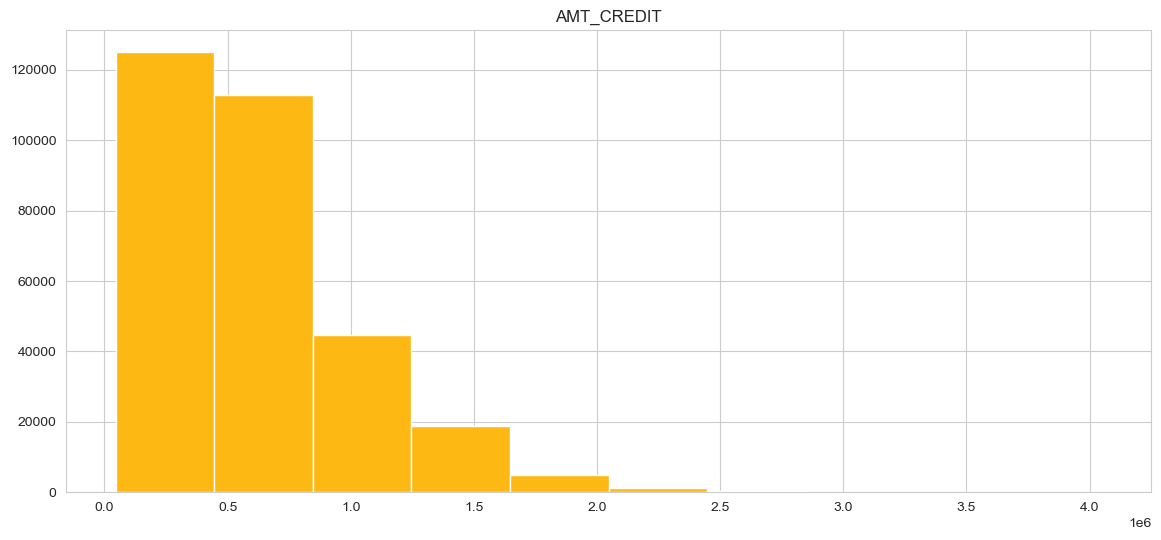

In [9]:
# Plot the histogram for credit amount
train.hist(column='AMT_CREDIT', figsize=(14, 6), color='#FDB813')

# Show the plot
plt.show()

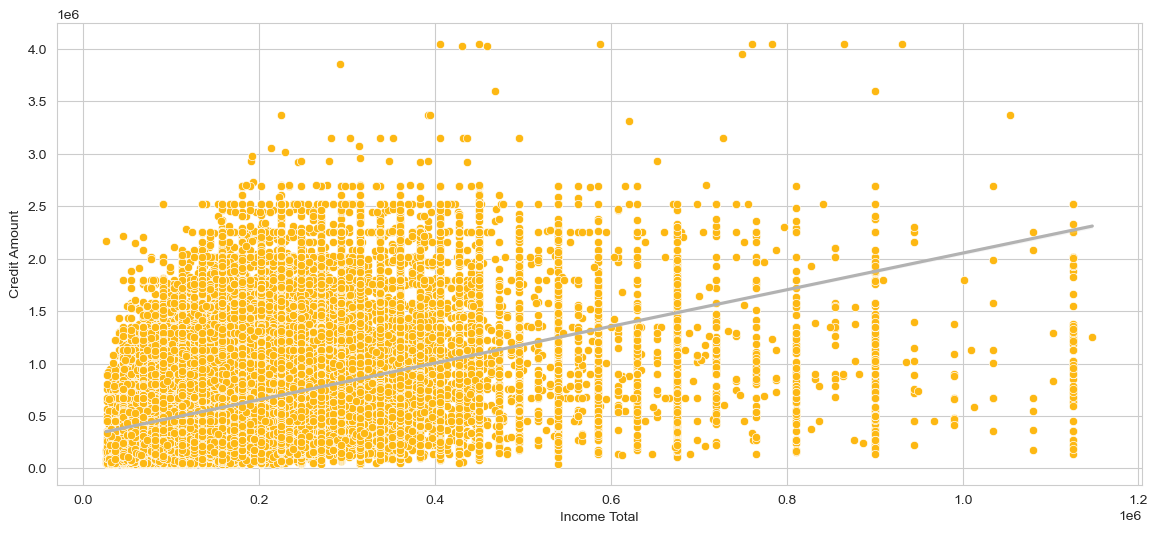

In [10]:
# Plot the scatter plot to compare income with credit
train_x = train[train['AMT_INCOME_TOTAL'] < 1160000]
fig, ax = plt.subplots(figsize=(14, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=train_x, color='#FDB813')

# Add the regression line
sns.regplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=train_x, scatter=False, color='#B2B2B2')

# Set custom axis labels
ax.set_xlabel('Income Total')
ax.set_ylabel('Credit Amount')

# Show the plot
plt.show()

There does appear to be a positive correlation between Income and Credit. 

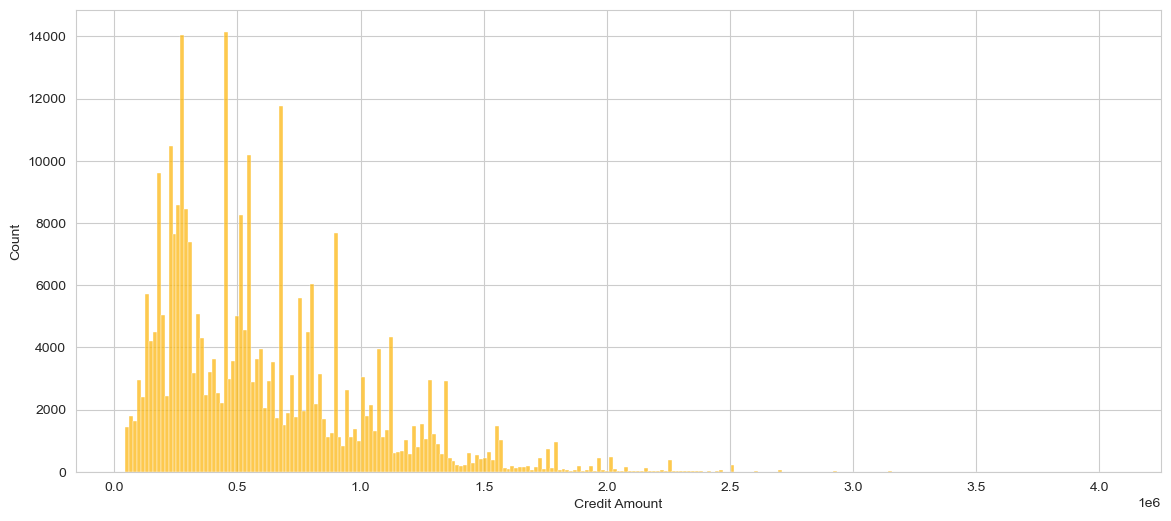

In [11]:
# Plot the histogram for AMT_CREDIT variable
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(data=train_x, x='AMT_CREDIT', color='#FDB813')

# Set custom axis labels
ax.set_xlabel('Credit Amount')
ax.set_ylabel('Count')

# Show the plot
plt.show()

The bulk of the awarded credit appears to be skewed to the lower end, indicating maybe an introductory limit or a conservative view of applying credit to a new customer. I will need to explore this further.

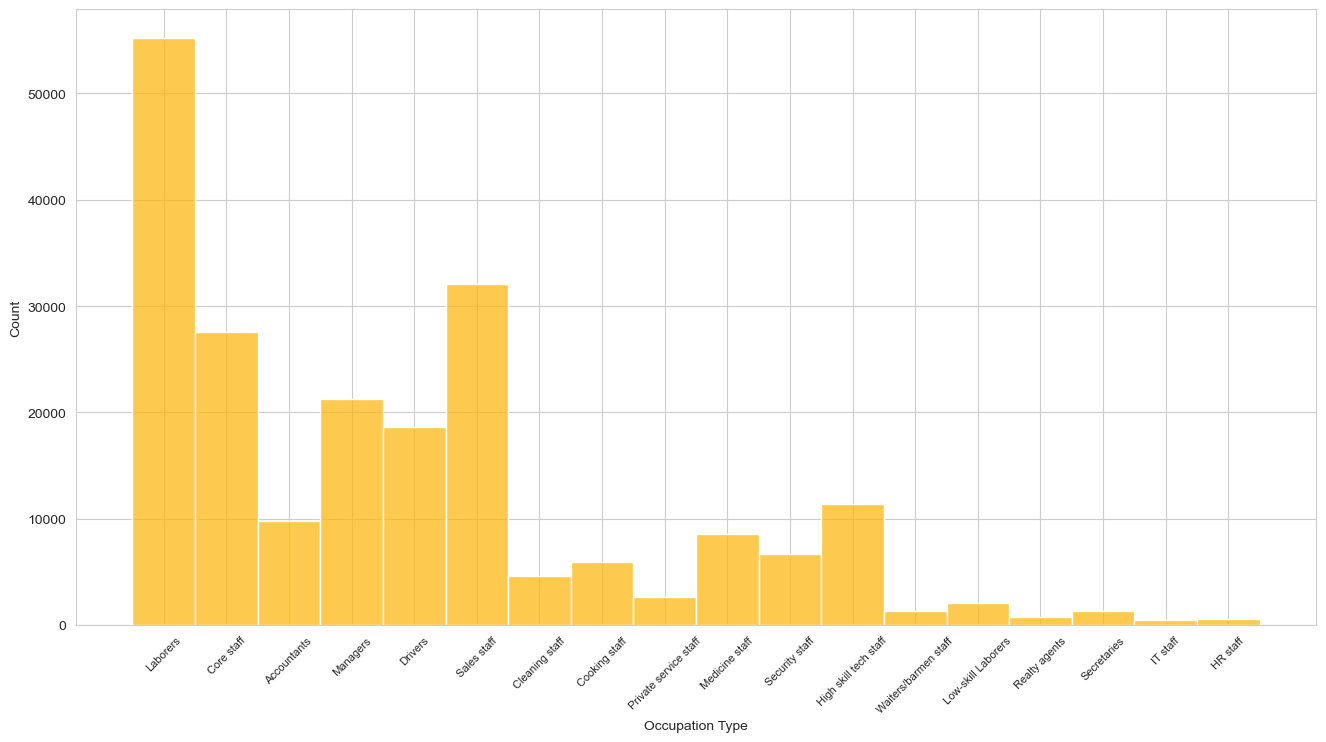

In [12]:
# Plot the histogram for OCCUPATION_TYPE variable with outlier removed
fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=train_x, x='OCCUPATION_TYPE', color='#FDB813')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45, fontsize=8)

# Set custom axis labels
ax.set_xlabel('Occupation Type')
ax.set_ylabel('Count')

# Show the plot
plt.show()

The 'Laborer' type appears to vastly outnumber any other occupation type. 

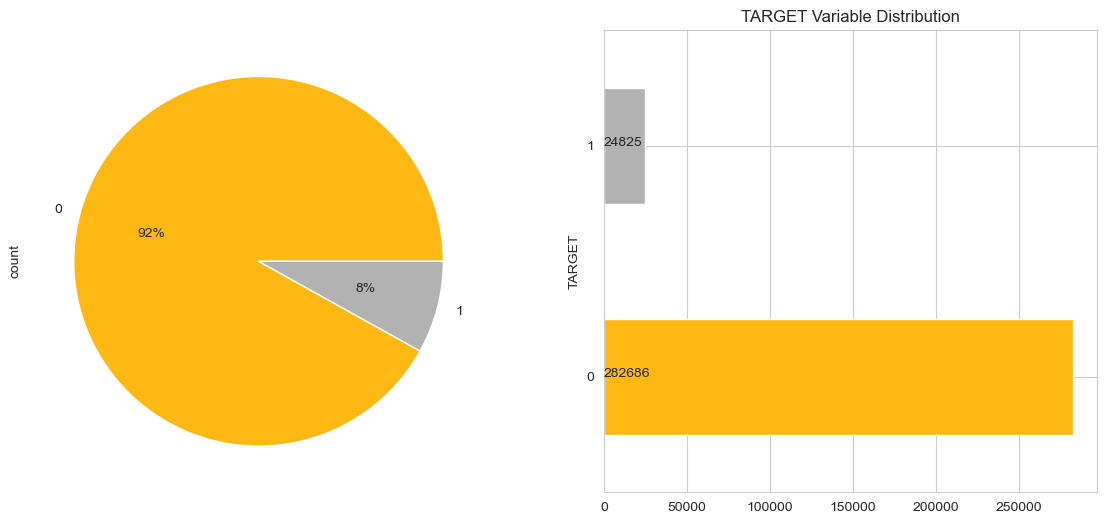

In [13]:
# Target distribution 
plt.figure(figsize=(14,6))
plt.subplot(121)
train.TARGET.value_counts().plot(kind='pie', autopct = "%1.0f%%", colors=['#FDB813','#B2B2B2'])
plt.subplot(122)
ax = train.TARGET.value_counts().plot(kind='barh', color=['#FDB813','#B2B2B2'])
for i,j in enumerate(train["TARGET"].value_counts().values):
    ax.text(10,i,j)
plt.title('TARGET Variable Distribution')
plt.show()

In [14]:
def missing_values_table(df):
    
    mis_val = train.isnull().sum()
    mis_val_percent = 100 * train.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
                                                        columns = {0 : 'Missing Values', 1 : '% of Total Values'}
                                                    )
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
                                                            mis_val_table_ren_columns.iloc[:,1] != 0
                                                         ].sort_values('% of Total Values', ascending=False)\
                                                          .round(1)
    
    print(
        "Your selected dataframe has " + str(df.shape[1]) + " columns.\n" +
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values."
    )
    
    return mis_val_table_ren_columns

In [15]:
# Missing values statistics
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


There are quite a few missing values in this dataset. When cleaning this data, great care will need to be taken to either remove or replace those values in a manner that will not tweak the data too much.

In [16]:
# Number of each type of column
train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [17]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [18]:
# Select only the numeric columns from the DataFrame
numeric_columns = train.select_dtypes(include=[np.number])

# looking at the most and least correlated variables to target
correlations = numeric_columns.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlatios:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlatios:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
R

In [19]:
# Calculating ages and displaying statistics
(train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

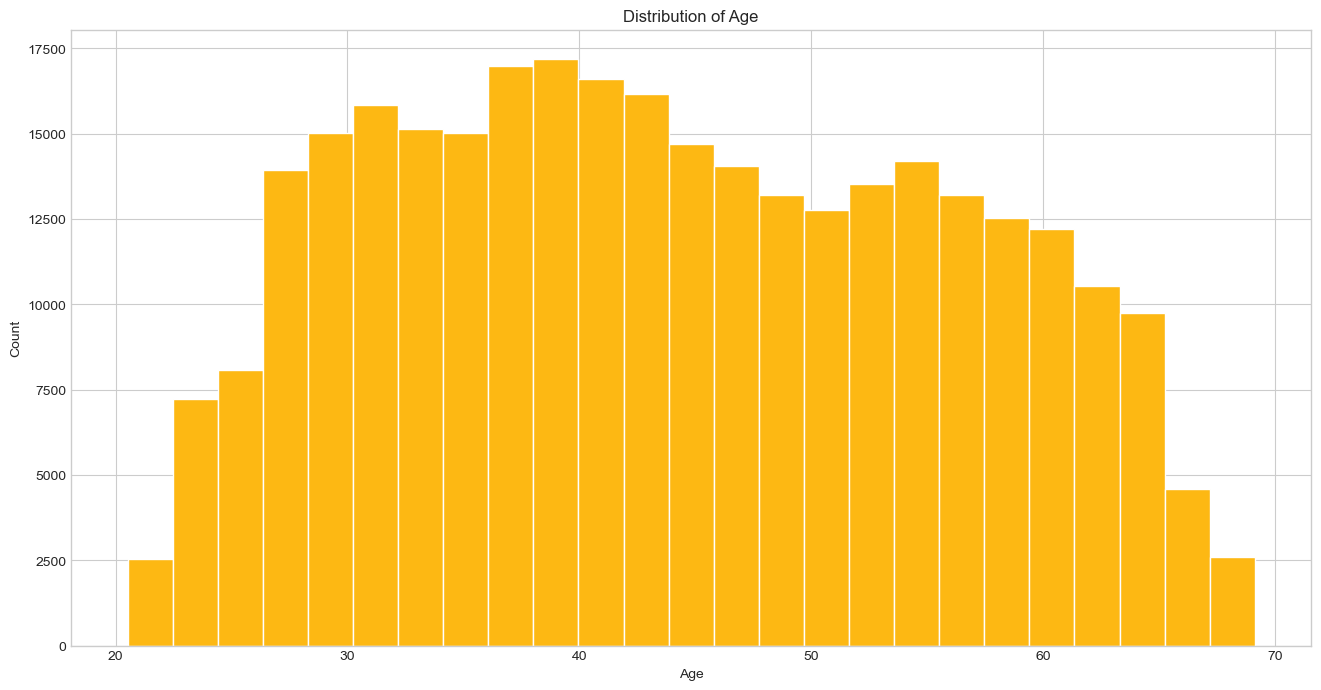

In [20]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16, 8))

plt.hist(train['DAYS_BIRTH'] / -365, bins = 25, color='#FDB813')
plt.title('Distribution of Age');
plt.xlabel('Age');
plt.ylabel('Count');

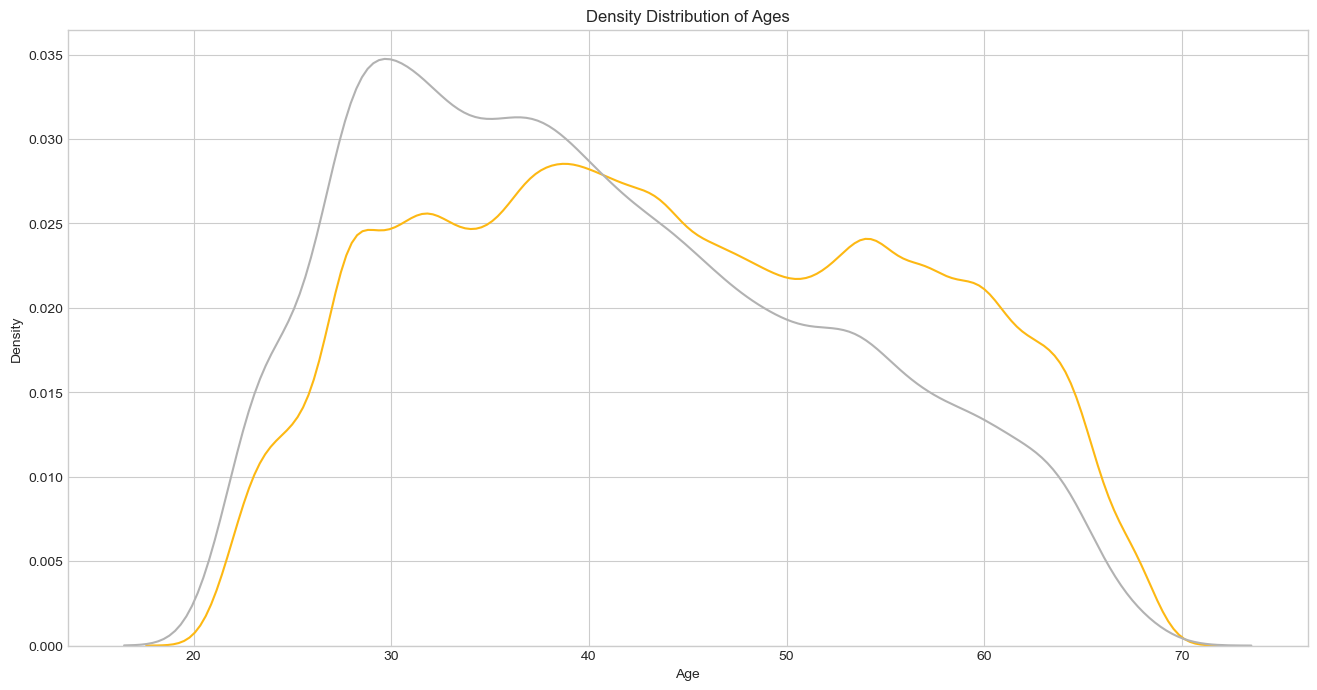

In [21]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,8))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label='target == 0', color='#FDB813')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label='target == 1', color='#B2B2B2')

plt.xlabel('Age');
plt.ylabel('Density');
plt.title('Density Distribution of Ages');

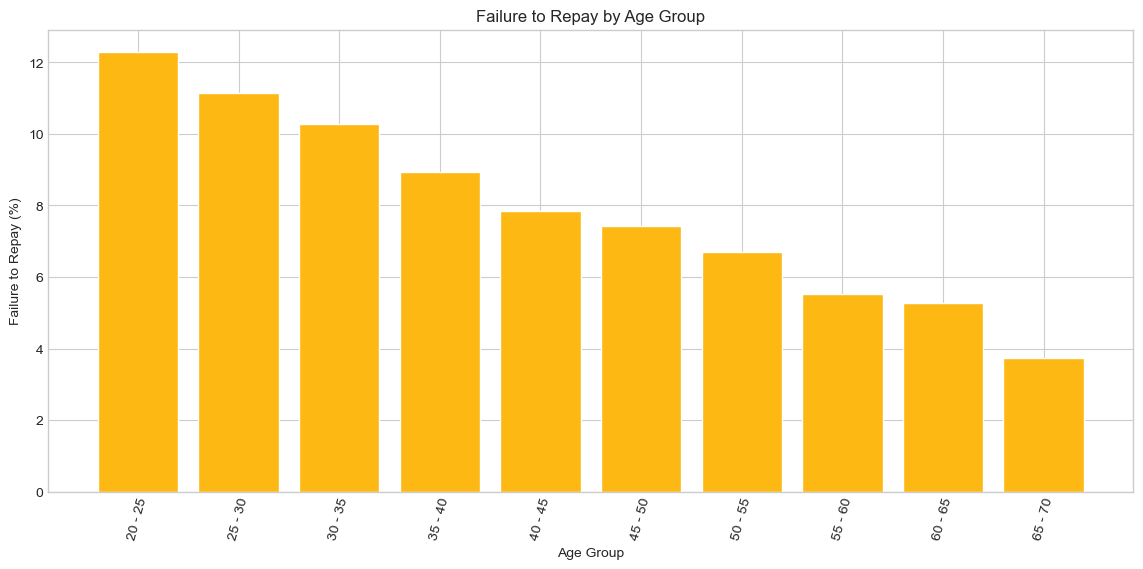

In [22]:
age_data = train[['TARGET', 'DAYS_BIRTH']].copy()
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))

age_groups = age_data.groupby('YEARS_BINNED').mean()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14, 6))

plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'], color='#FDB813')

plt.xticks(rotation=75)
plt.xlabel('Age Group')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

# Clean up the tick labels
tick_labels = ['{} - {}'.format(int(value.left), int(value.right)) for value in age_groups.index]
plt.gca().set_xticks(range(len(tick_labels)))
plt.gca().set_xticklabels(tick_labels, rotation=75)

plt.show()  # Display the plot

Groups appear to have a harder time repaying credit when they are younger. I'm slightly concerned about the direct downward trend associated with age. Age was shown to be a highly correlative feature earlier in the analysis.

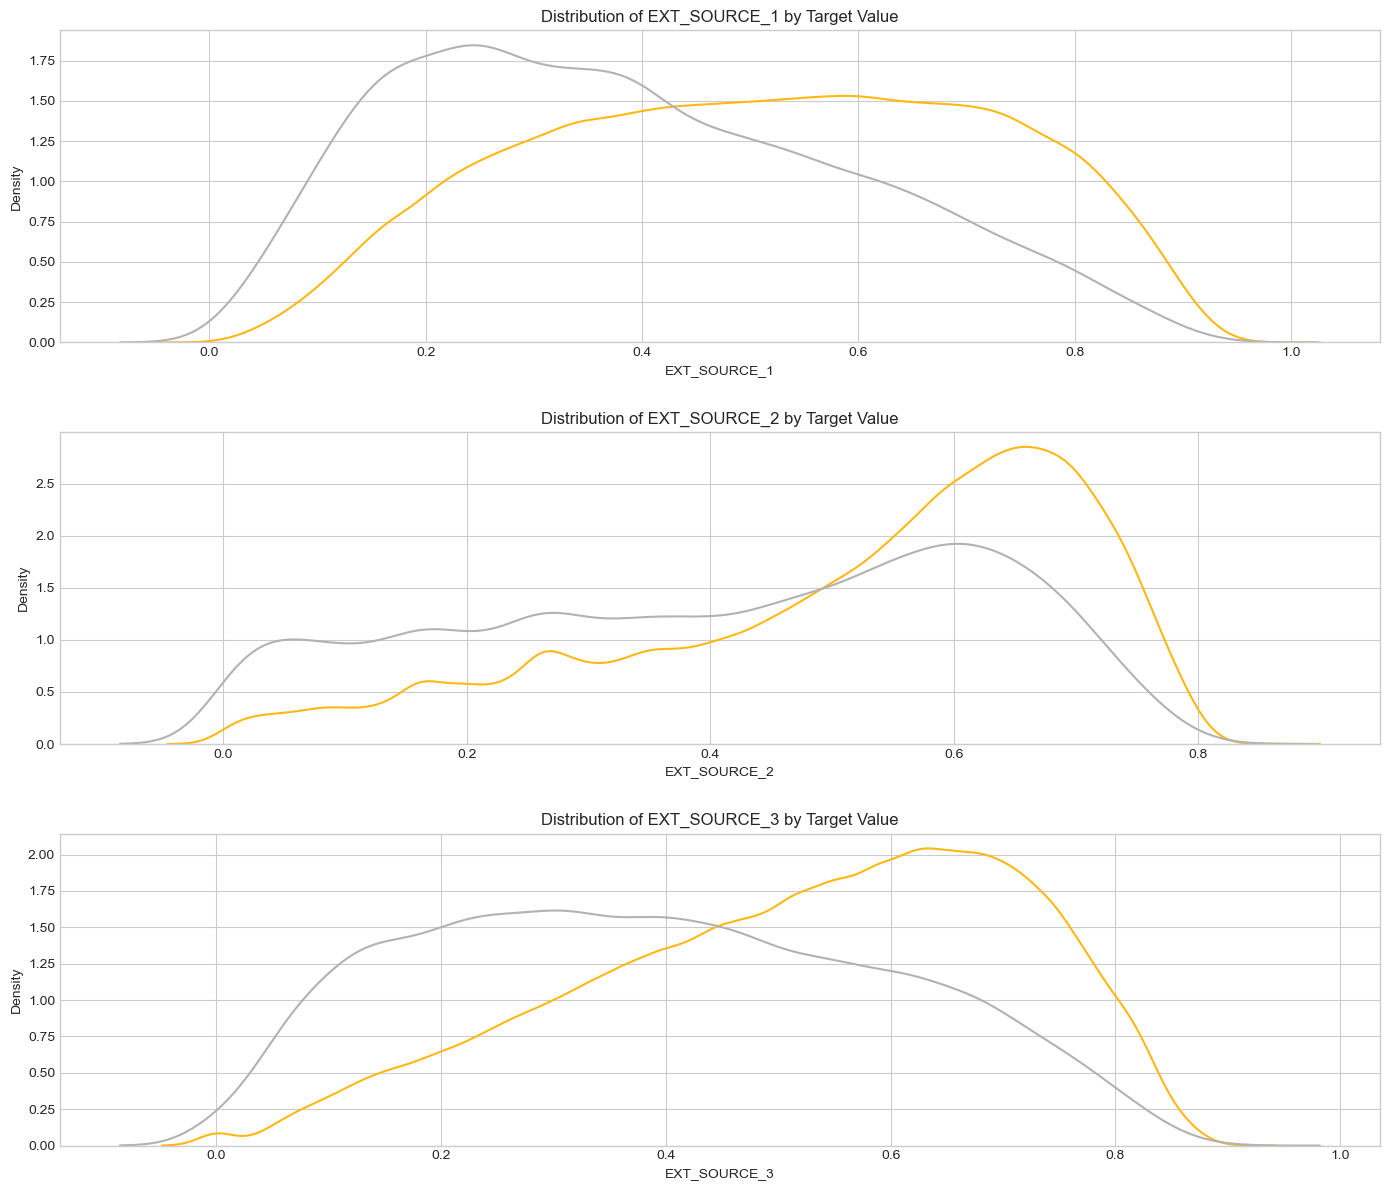

In [23]:
plt.figure(figsize=(14,12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    plt.subplot(3, 1, i + 1)
    
    sns.kdeplot(train.loc[train['TARGET']==0, source], label = 'target == 0', color='#FDB813')
    sns.kdeplot(train.loc[train['TARGET']==1, source], label = 'target == 1', color='#B2B2B2')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source);
    plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

<a id='modeling'></a>
### XGBoost Modeling

In [24]:
# creating a new function to streamline removal of columns missing more than 40% of values
def values_missing(df):
    
    missing = df.isnull().sum()/df.shape[0]
    pct_missing = missing * 100
    return pct_missing.sort_values(ascending=False).round(2)

In [25]:
# running the formula on the train set
train_values_missing = values_missing(train)

In [26]:
df_train_missing_values = pd.DataFrame({'columns': train_values_missing.index, 'missing percent': train_values_missing.values})

In [27]:
# Printing list of columns to be removed
d_columns = df_train_missing_values[df_train_missing_values['missing percent'] > 40]['columns'].tolist()
d_columns

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [28]:
# dropping the columns from both train and test sets
train_d = train.drop(d_columns, axis = 1)
test_d = test.drop(d_columns, axis = 1)

print('Shape of original train set:', train.shape)
print('Shape of original test set:', test.shape)
print('\n')
print('Shape of training set:', train_d.shape)
print('Shape of test set:', test_d.shape)

Shape of original train set: (307511, 122)
Shape of original test set: (48744, 121)


Shape of training set: (307511, 73)
Shape of test set: (48744, 72)


In [29]:
# converting categorical to dummy variables for xgboost
train_d = pd.get_dummies(train_d)
test_d = pd.get_dummies(test_d)

In [30]:
# extracting the target and ID variables
train_labels = train_d['TARGET']
train_sk_id_curr = train_d['SK_ID_CURR']
test_sk_id_curr = test_d['SK_ID_CURR']

In [31]:
# dropping SK_ID_CURR column
train_d.drop('SK_ID_CURR', inplace=True, axis=1)
test_d.drop('SK_ID_CURR', inplace=True, axis=1)

In [32]:
# aligning the train and test sets with inner join
train_d, test_d = train_d.align(test_d, join = 'inner', axis=1)

In [33]:
# printing both sets to verify
print('Training set features shape:', train_d.shape)
print('Testing set features shape:', test_d.shape)

Training set features shape: (307511, 180)
Testing set features shape: (48744, 180)


In [34]:
# importing libraries to run the xgboost model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import roc_auc_score

In [35]:
# calculating class imbalance in the dataset
i_ratio = round((train_labels == 0).sum() / (train_labels == 1).sum(), 4)
print('The Class Imbalance Ratio is:', i_ratio)

The Class Imbalance Ratio is: 11.3872


In [36]:
# splitting the train set further
X_train, X_test, y_train, y_test = train_test_split(train_d, 
                                                    train_labels, 
                                                    test_size=0.2, 
                                                    stratify=train_labels, 
                                                    random_state=1)

# Printing the positive and negative examples
print("Postive examples in train set: {}".format(np.sum(y_train==0)))
print("Negative examples in train set: {}".format(np.sum(y_train==1)))
print('\n')
print("Postive examples in test set: {}".format(np.sum(y_test==0)))
print("Negative examples in test set: {}".format(np.sum(y_test==1)))

Postive examples in train set: 226148
Negative examples in train set: 19860


Postive examples in test set: 56538
Negative examples in test set: 4965


In [37]:
# initializing the classifier
xg_class = XGBClassifier(n_estimators=1000, 
                         objective='binary:logistic', 
                         gamma=0.1, 
                         subsample=0.5, 
                         scale_pos_weight=i_ratio, 
                         eval_metric='auc')

# fitting the classifier
class_fit = xg_class.fit(X_train, 
                         y_train, 
                         eval_set=[(X_test, y_test)], 
                         early_stopping_rounds=10)

[0]	validation_0-auc:0.71080
[1]	validation_0-auc:0.71979
[2]	validation_0-auc:0.72406
[3]	validation_0-auc:0.72556
[4]	validation_0-auc:0.72875
[5]	validation_0-auc:0.73219
[6]	validation_0-auc:0.73515
[7]	validation_0-auc:0.73814
[8]	validation_0-auc:0.73952
[9]	validation_0-auc:0.74004
[10]	validation_0-auc:0.74093
[11]	validation_0-auc:0.74207
[12]	validation_0-auc:0.74302
[13]	validation_0-auc:0.74309
[14]	validation_0-auc:0.74389
[15]	validation_0-auc:0.74406
[16]	validation_0-auc:0.74410
[17]	validation_0-auc:0.74444
[18]	validation_0-auc:0.74499
[19]	validation_0-auc:0.74536
[20]	validation_0-auc:0.74512
[21]	validation_0-auc:0.74532
[22]	validation_0-auc:0.74601
[23]	validation_0-auc:0.74638
[24]	validation_0-auc:0.74633
[25]	validation_0-auc:0.74610
[26]	validation_0-auc:0.74583
[27]	validation_0-auc:0.74583
[28]	validation_0-auc:0.74628
[29]	validation_0-auc:0.74596
[30]	validation_0-auc:0.74545
[31]	validation_0-auc:0.74543
[32]	validation_0-auc:0.74553
[33]	validation_0-au

In [63]:
# Get the best iteration from the xg_class object
n_estimators = xg_class.best_iteration

# Create an instance of the XGBClassifier class with the specified parameters
b_xg_class = XGBClassifier(n_estimators=n_estimators, 
                           objective='binary:logistic', 
                           gamma=0.1, 
                           subsample=0.5, 
                           scale_pos_weight=i_ratio )

# Fit the XGBClassifier model to the training data and evaluate it using the specified evaluation set and metric
b_xg_class_fit = b_xg_class.fit(train_d.values, 
                                train_labels.values, 
                                eval_set=[(train_d.values, 
                                           train_labels.values)], 
                                eval_metric='auc')

[0]	validation_0-auc:0.71796
[1]	validation_0-auc:0.72901
[2]	validation_0-auc:0.73399
[3]	validation_0-auc:0.73734
[4]	validation_0-auc:0.74186
[5]	validation_0-auc:0.74509
[6]	validation_0-auc:0.74839
[7]	validation_0-auc:0.75239
[8]	validation_0-auc:0.75390
[9]	validation_0-auc:0.75636
[10]	validation_0-auc:0.75966
[11]	validation_0-auc:0.76112
[12]	validation_0-auc:0.76249
[13]	validation_0-auc:0.76394
[14]	validation_0-auc:0.76568
[15]	validation_0-auc:0.76729
[16]	validation_0-auc:0.76873
[17]	validation_0-auc:0.76987
[18]	validation_0-auc:0.77111
[19]	validation_0-auc:0.77229
[20]	validation_0-auc:0.77311
[21]	validation_0-auc:0.77377
[22]	validation_0-auc:0.77475


<a id='predictions'></a>
### Predictions and Submission

In [58]:
# predictions on the test set
pred = b_xg_class.predict_proba(test_d.values)[:, 1]
pred

array([0.00054544, 0.13625737, 0.00575614, ..., 0.00214053, 0.00163725,
       0.27601367], dtype=float32)

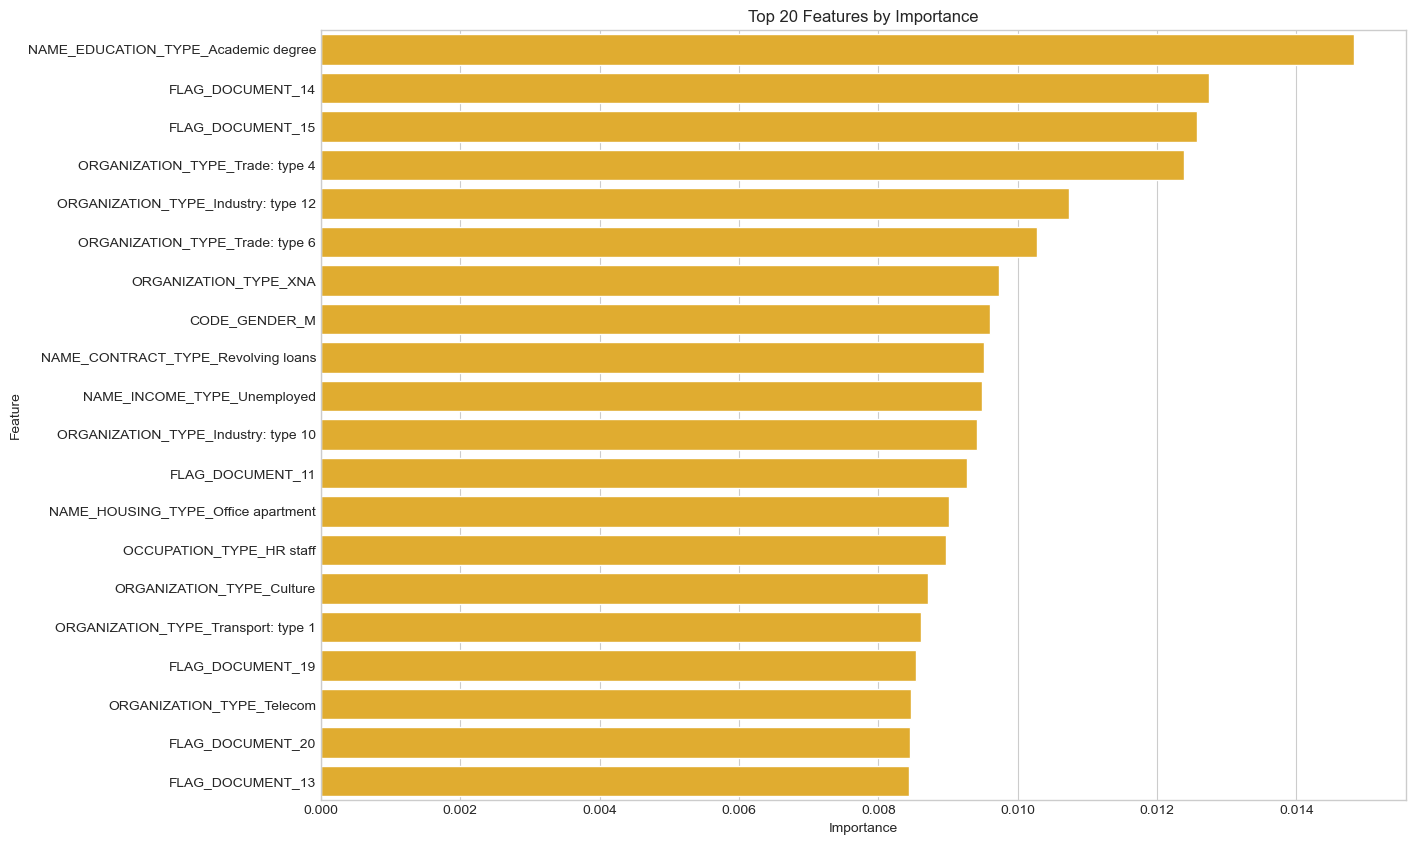

In [59]:
# charting the top 20 variables by importance
top20 = pd.DataFrame({'features': test_d.columns, 'importance': b_xg_class.feature_importances_}).sort_values('importance', ascending=False).head(20)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14, 10))

sns.barplot(x=top20['importance'], y=top20['features'], color='#FDB813', orient='h')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')

plt.show()  # Display the plot

In [60]:
# creating new dataframe for submission to Kaggle
submission = pd.DataFrame({'SK_ID_CURR': test_sk_id_curr.values, 'TARGET': pred})

In [61]:
# taking a look at the submission results
submission.head(10)

,SK_ID_CURR,TARGET
0,100001,0.000545
1,100005,0.136257
2,100013,0.005756
3,100028,0.035424
4,100038,0.160732
5,100042,0.009313
6,100057,0.001233
7,100065,0.105654
8,100066,0.000450
9,100067,0.000978


In [62]:
# creating csv file for submission
submission.to_csv('home_default_xgboost_jdh(5).csv', index = False)

<a id='conclusion'></a>
### Conclusion

The above is basic, initial EDA and XGBoost modeling of the data supplied for this project. This model scored .725 on Kaggle's AUC scoring.

**Takeaways:**  
* Age appears to have the highest correlation to the target variable
* There are quite a few missing data points
 * This will need to be addressed in cleaning the data
 * I am actually a little concerned with the amount of missing data
* Age, occupation, and car ownership look to have a high correlation and will be investigated more
* There is a lot to work with here, and a simple approach of logistic regression may work best for the model. This will be determined at a later date